## Dependencies

### Library Installation (if needed)

In [20]:
#! pip install -qUr requirements.txt

In [21]:
from methods.screener_methods import *
from tqdm import tqdm
import pandas as pd

### Single import

,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,PB Score,...,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,AMBU-B.CO,Ambu A/S,Sell,-0.64,-0.58,-0.05,-0.01,-1.17,0.78,-0.19,...,38.57,6.61,2.28,3.88,0.0,-0.01,Healthcare,Medical Devices,Denmark,False


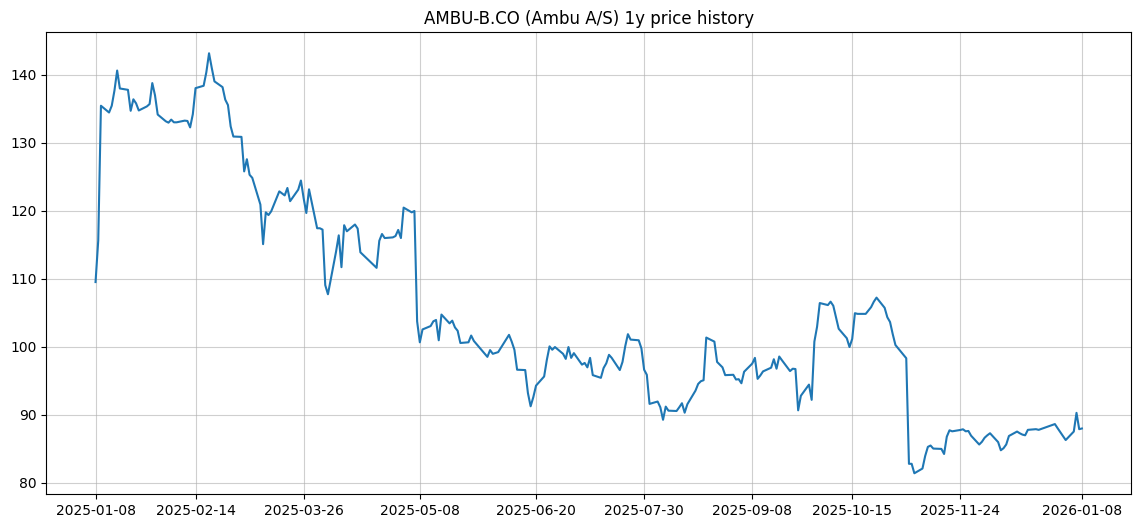

50d Average Change%: -0.0051242937


In [27]:
symbol = "AMBU-B.CO"
stock = Stock(symbol)
display(stock.summary())
stock.price_graph("1y")
print(f"50d Average Change%: {yf.Ticker(symbol).info["fiftyDayAverageChangePercent"]}")


### Screener

In [23]:
symbol_list = "simple" #"simple", "danish", "filtered", "all"

if symbol_list == "all":
    symbols = (
        pd.read_csv("../data/tickers/tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()
    )
elif symbol_list == "filtered":
    symbols = pd.read_csv("../data/tickers/screener_filtered_tickers.csv")["Ticker"].tolist()
elif symbol_list == "danish":
    symbols = pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist()
else:
    symbols = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].tolist()
symbols = list(set(symbols))

In [24]:
import sys, io
df = pd.DataFrame()
for symbol in tqdm(symbols, smoothing=0):
    old_stderr = sys.stderr
    sys.stderr = io.StringIO()
    try:
        df = pd.concat([df, Stock(symbol).summary()])
    except Exception:
        pass
    finally:
        sys.stderr = old_stderr
df = df.sort_values(by="Recommendation Score", ascending=False)
display(df)
if symbol_list == "simple":
    df.to_csv("../data/screener_results/simple_screener_results.csv", index=False)
elif symbol_list == "danish":
    df.to_csv("../data/screener_results/danish_screener_results.csv", index=False)
elif symbol_list == "filtered" or symbol_list == "all":   
    df.to_csv("../data/screener_results/screener_results.csv", index=False)
    df["Ticker"].to_csv("../data/tickers/screener_filtered_tickers.csv", index=False)

  0%|          | 0/71 [00:00<?, ?it/s]

100%|██████████| 71/71 [00:49<00:00,  1.43it/s]


,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,PB Score,...,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,BAVA.CO,Bavarian Nordic A/S,Buy,2.48,2.07,0.36,0.05,1.03,0.92,0.12,...,6.55,7.78,30.70,1.20,0.0,0.03,Healthcare,Biotechnology,Denmark,False
0,HLUN-A.CO,H. Lundbeck A/S A,Buy,2.04,1.91,0.03,0.10,0.89,0.95,0.07,...,9.79,8.28,3.84,1.48,0.0,0.07,Healthcare,Drug Manufacturers - Specialty & Generic,Denmark,True
0,GUBRA.CO,Gubra A/S,Buy,2.01,1.88,-0.00,0.14,1.08,1.00,-0.20,...,4.93,78.15,106.08,7.04,0.0,0.10,Healthcare,Biotechnology,Denmark,True
0,TRMD,TORM plc,Buy,1.98,1.76,0.16,0.06,0.98,0.65,0.14,...,8.08,5.99,2.73,1.00,0.0,0.04,Energy,Oil & Gas Midstream,United Kingdom,True
0,ZEAL.CO,Zealand Pharma A/S,Buy,1.93,2.07,0.02,-0.16,1.09,1.00,-0.02,...,4.66,33.45,91.31,1.97,0.0,-0.13,Healthcare,Biotechnology,Denmark,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,BAESY,BAE Systems PLC,Sell,-0.91,-1.22,0.16,0.15,-0.99,-0.03,-0.20,...,29.72,4.27,3.52,21.45,0.0,0.12,Industrials,Aerospace & Defense,United Kingdom,False
0,VWS.CO,Vestas Wind Systems A/S,Sell,-1.16,-1.48,0.16,0.16,-0.80,-0.48,-0.20,...,26.16,3.19,6.96,7.01,0.0,0.14,Industrials,Specialty Industrial Machinery,Denmark,False
0,SAAB-B.ST,SAAB AB ser. B,Sell,-1.18,-1.55,0.18,0.19,-1.20,-0.16,-0.20,...,66.79,3.99,9.59,8.41,0.0,0.25,Industrials,Aerospace & Defense,Sweden,False
0,SOLAR-B.CO,Solar B A/S,Sell,-1.53,-1.81,0.22,0.06,-1.20,-0.76,0.15,...,57.49,2.15,3.54,0.86,0.0,0.04,Technology,Electronics & Computer Distribution,Denmark,False
